In [1]:
!pip install -U sweetviz

Defaulting to user installation because normal site-packages is not writeable


# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Требуется построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания (RMSE < 2500);
- скорость предсказания;
- время обучения.

<font color='green'>Цель</font>

Выбрать оптимальную модель для предсказания цены автомобиля с учетом требований заказчика.

<font color='green'>Задачи</font>

- исследовать данные;
- подготовить данные;
- обучить модели;
- проанализировать результаты;
- выбрать оптимальную модель;

<font color='green'>Файлы</font>

- `autos.csv`

<font color='green'>Признаки</font>

- `DateCrawled` — дата скачивания анкеты из базы;
- `VehicleType` — тип автомобильного кузова;
- `RegistrationYear` — год регистрации автомобиля;
- `Gearbox` — тип коробки передач;
- `Power` — мощность (л. с.);
- `Model` — модель автомобиля;
- `Kilometer` — пробег (км);
- `RegistrationMonth` — месяц регистрации автомобиля;
- `FuelType` — тип топлива;
- `Brand` — марка автомобиля;
- `NotRepaired` — была машина в ремонте или нет;
- `DateCreated` — дата создания анкеты;
- `NumberOfPictures` — количество фотографий автомобиля;
- `PostalCode` — почтовый индекс владельца анкеты (пользователя);
- `LastSeen` — дата последней активности пользователя.

<font color='green'>Целевой признак</font>

- `Price` - цена (евро).

<font color='green'>Содержание</font>

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-знакомство-с-данными" data-toc-modified-id="Загрузка-и-знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и знакомство с данными</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#OHE-и-масштабирование-признаков" data-toc-modified-id="OHE-и-масштабирование-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>OHE и масштабирование признаков</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#Искусственная-модель" data-toc-modified-id="Искусственная-модель-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Искусственная модель</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Здорово, что вместе с названием есть описание проекта и представление!.</div>

## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import time

from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import  DummyRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Загрузка и знакомство с данными

In [3]:
data = pd.read_csv('/ML/datasets/autos.csv')

In [4]:
data.head().T

,0,1,2,3,4
DateCrawled,2016-03-24 11:52:17,2016-03-24 10:58:45,2016-03-14 12:52:21,2016-03-17 16:54:04,2016-03-31 17:25:20
Price,480,18300,9800,1500,3600
VehicleType,NaN,coupe,suv,small,small
RegistrationYear,1993,2011,2004,2001,2008
Gearbox,manual,manual,auto,manual,manual
Power,0,190,163,75,69
Model,golf,NaN,grand,golf,fabia
Kilometer,150000,125000,125000,150000,90000
RegistrationMonth,0,5,8,6,7
FuelType,petrol,gasoline,gasoline,petrol,gasoline


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Изменим тип данных у дат.

In [8]:
data['DateCrawled'] = pd.to_datetime(data['DateCrawled'], format='%Y.%m.%d')
data['DateCreated'] = pd.to_datetime(data['DateCreated'], format='%Y.%m.%d')
data['LastSeen'] = pd.to_datetime(data['LastSeen'], format='%Y.%m.%d')

                                             |          | [  0%]   00:00 -> (? left)


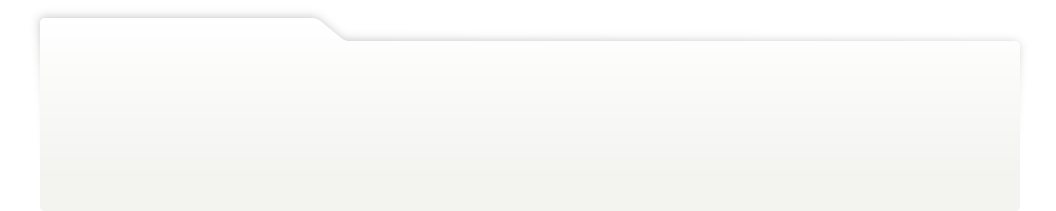
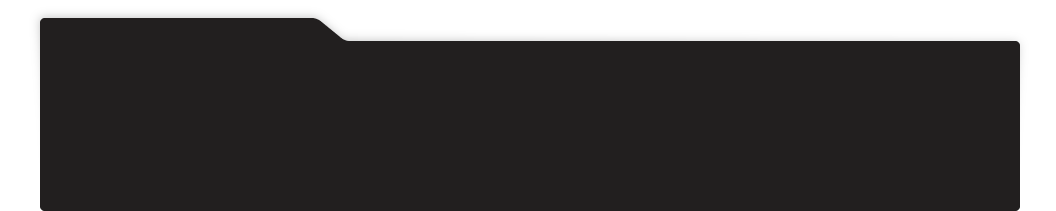
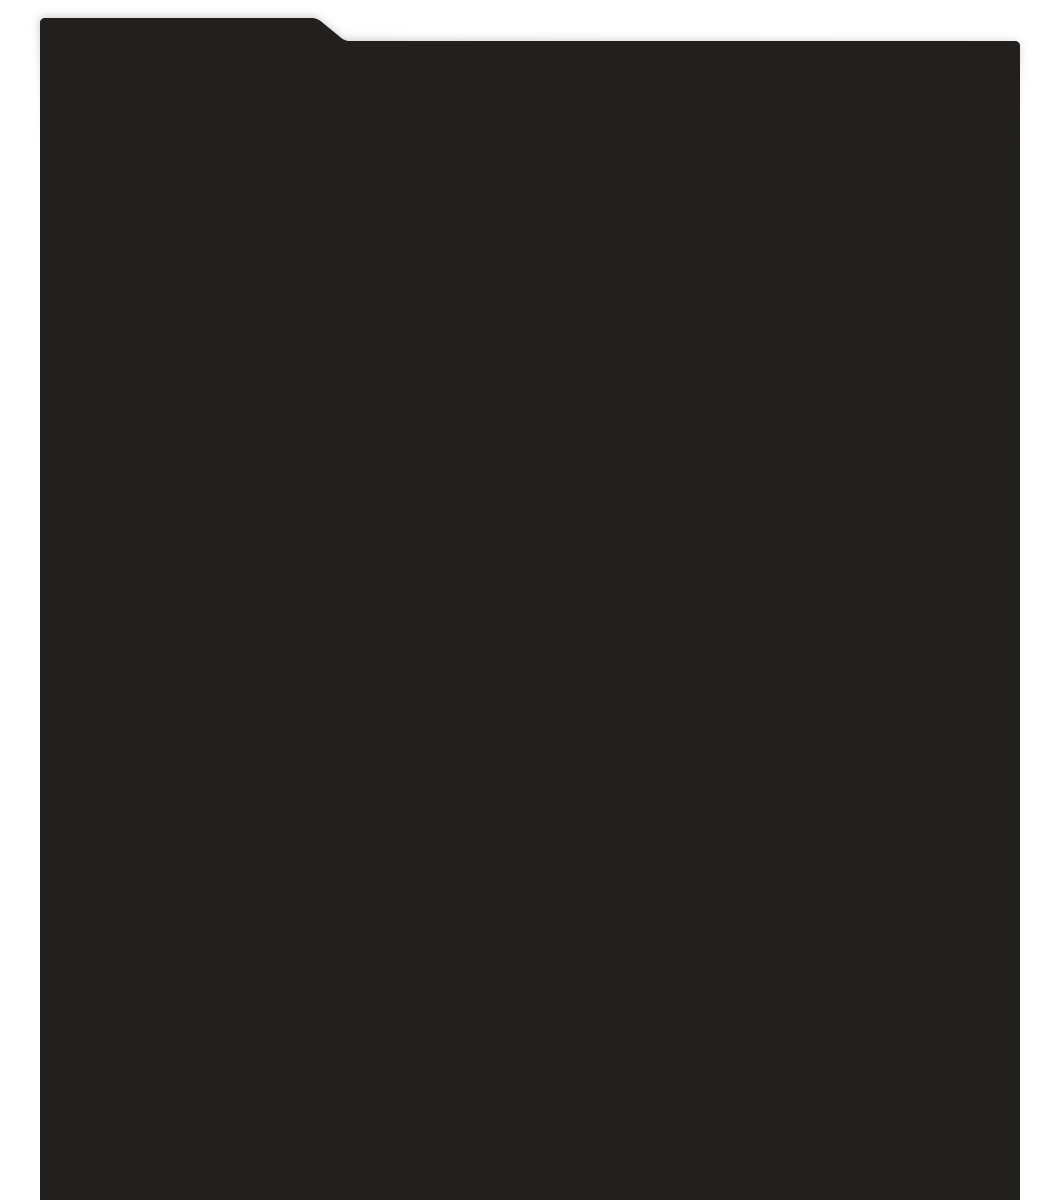
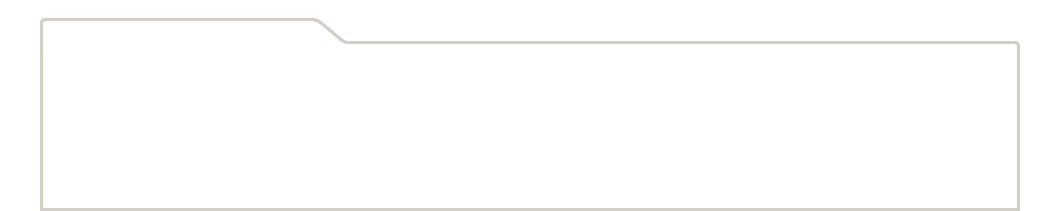
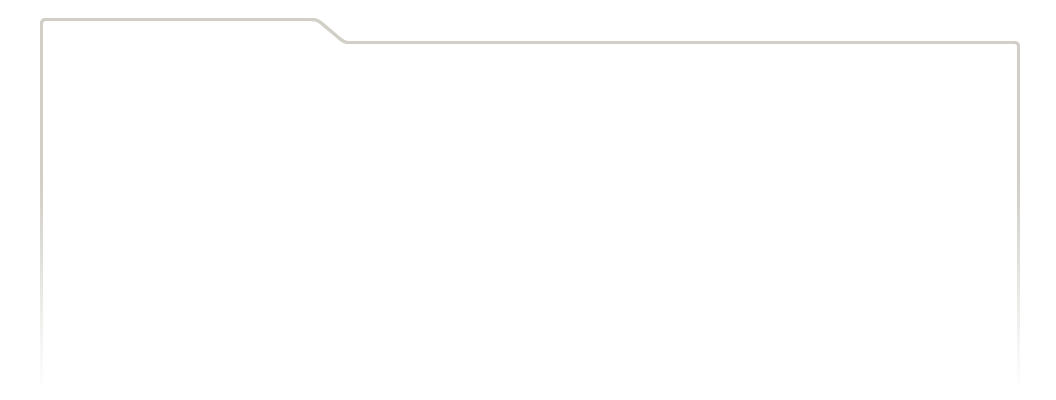
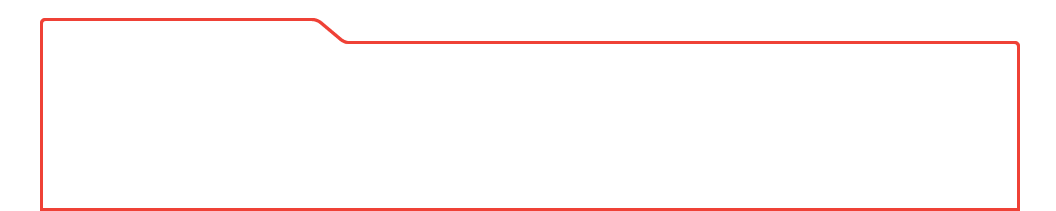
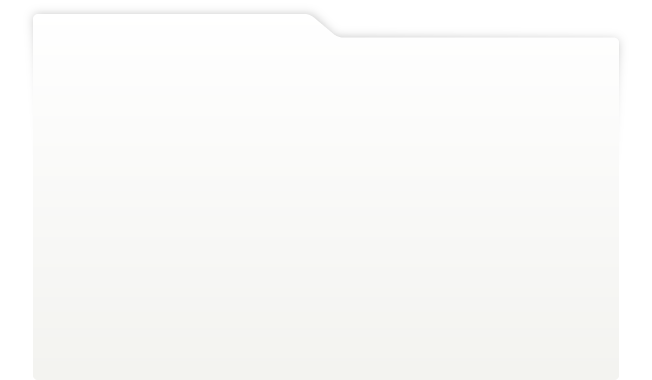
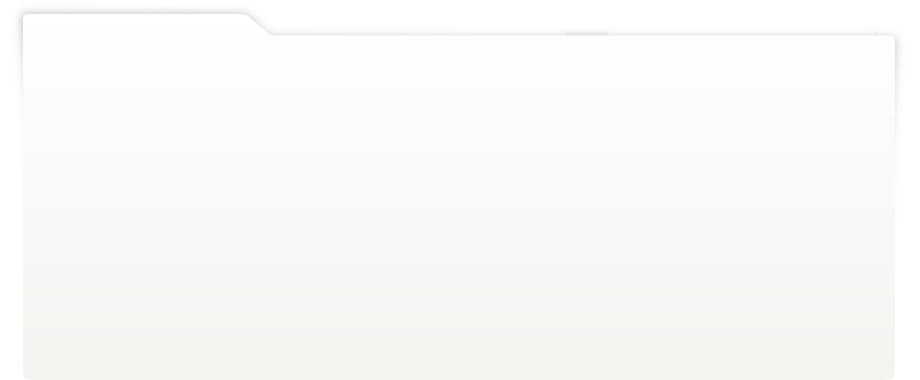
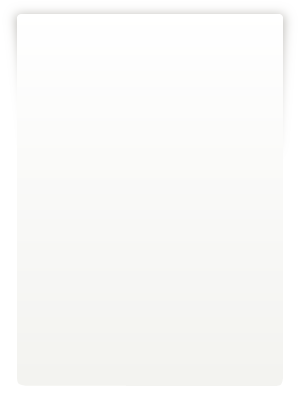
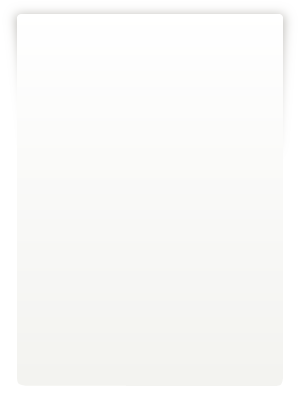
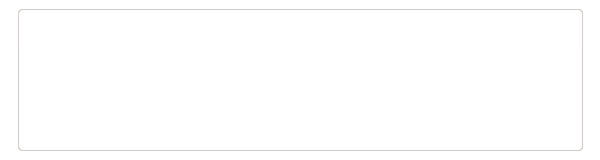
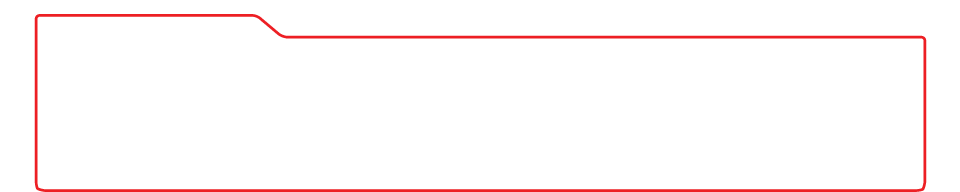
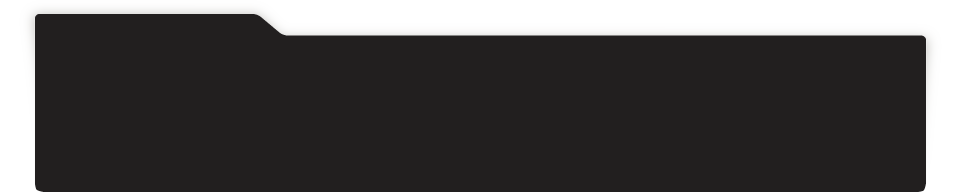
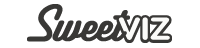
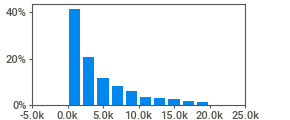
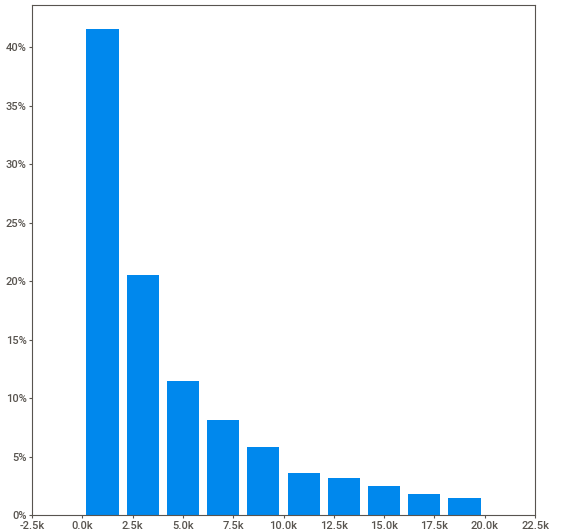
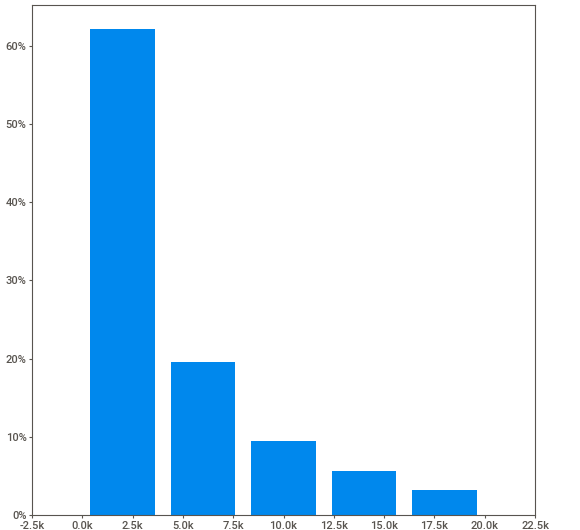
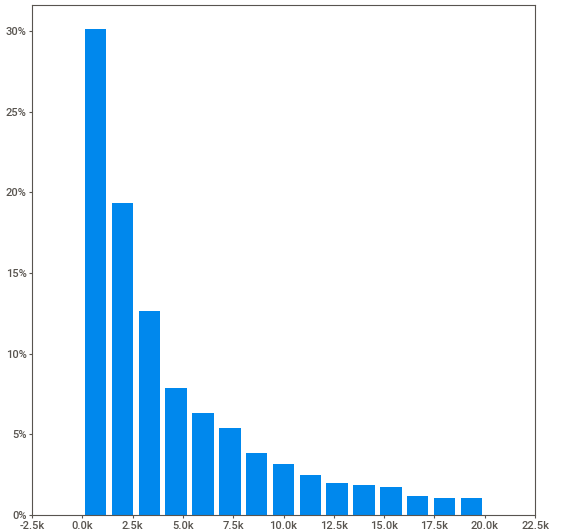
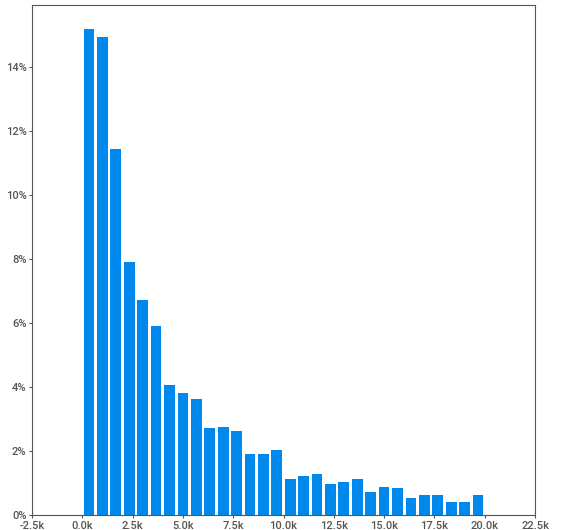
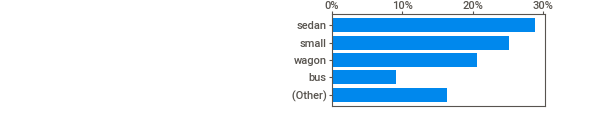
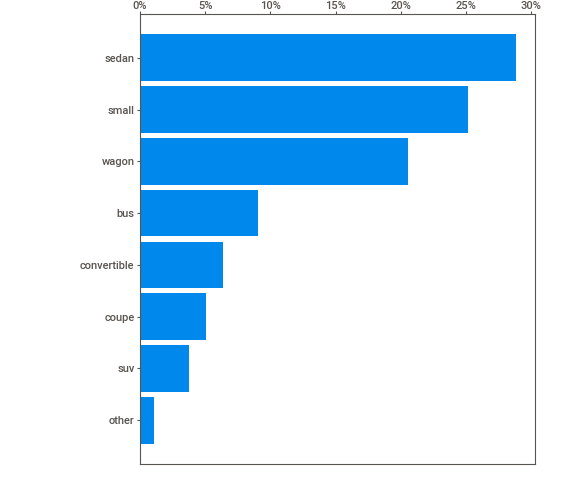
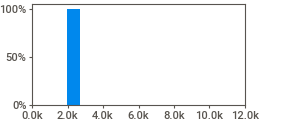
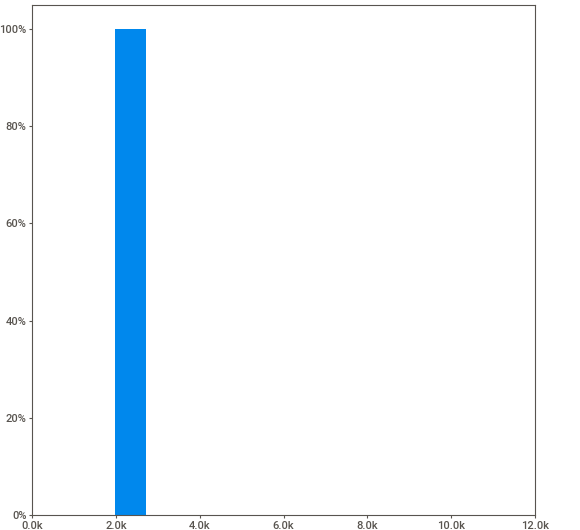
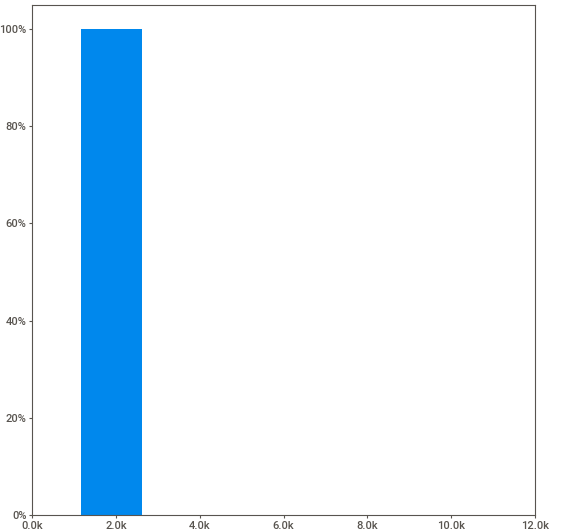
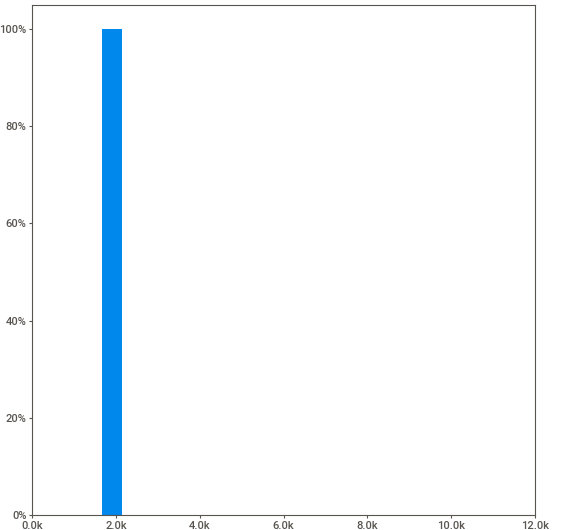
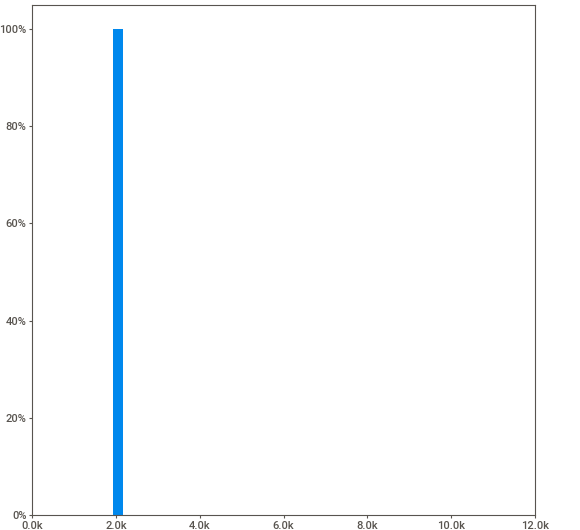
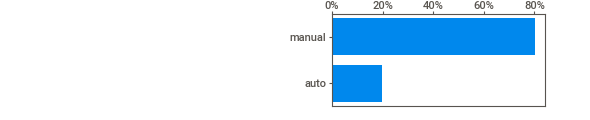
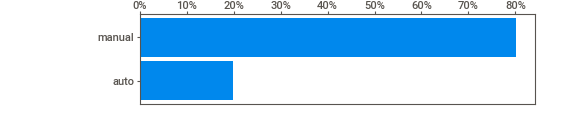
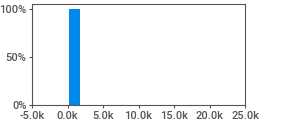
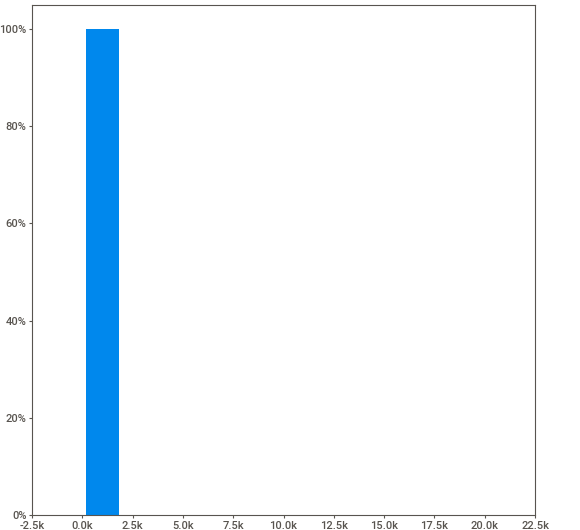
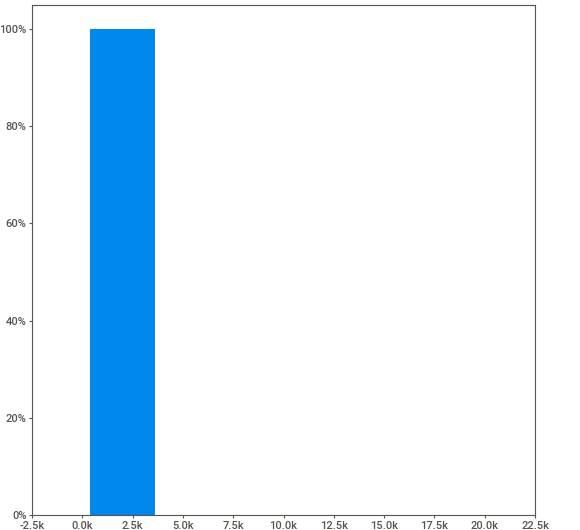
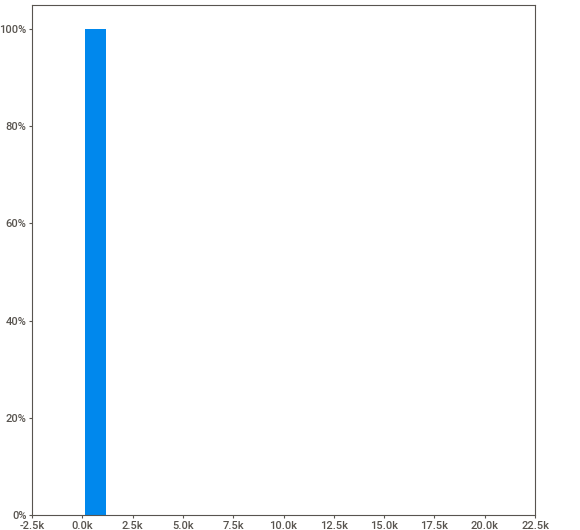
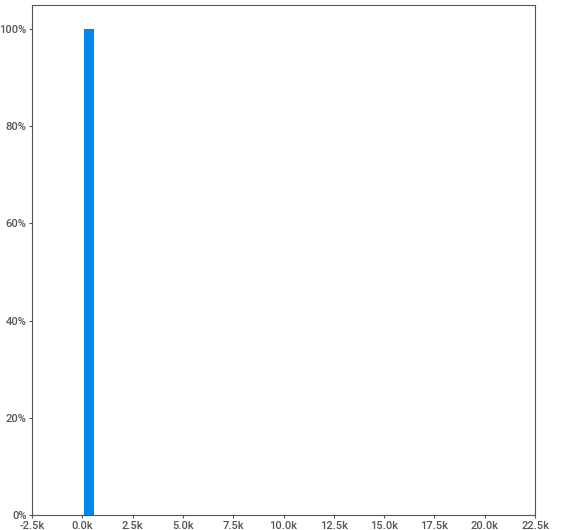
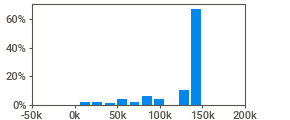
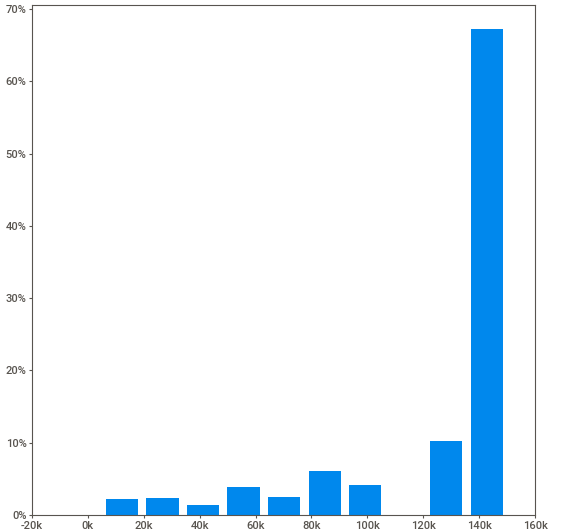
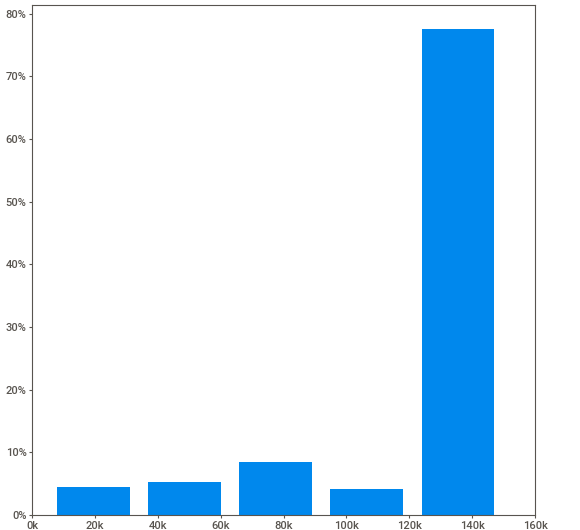
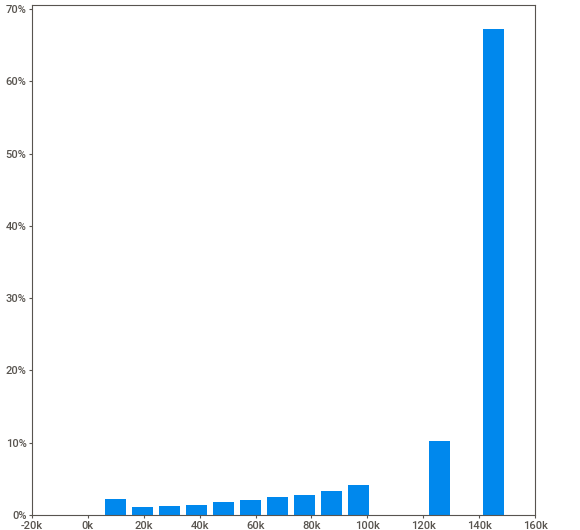
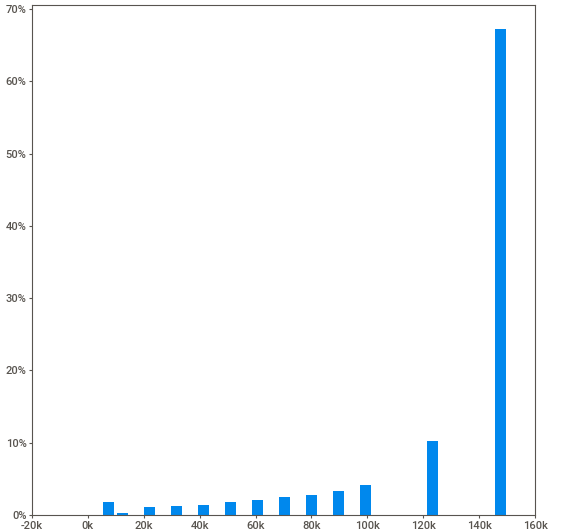
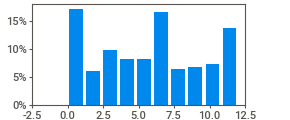
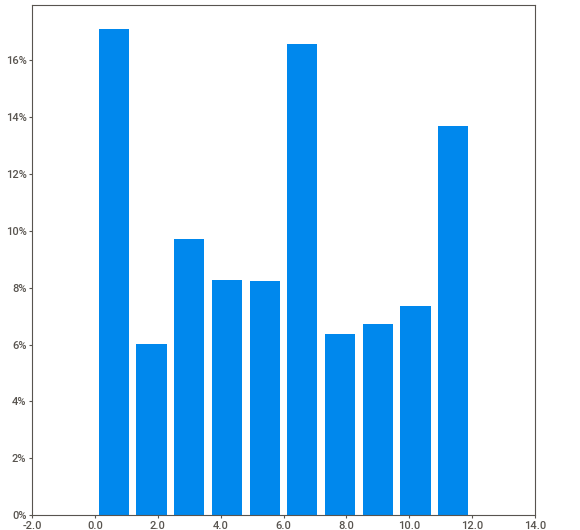
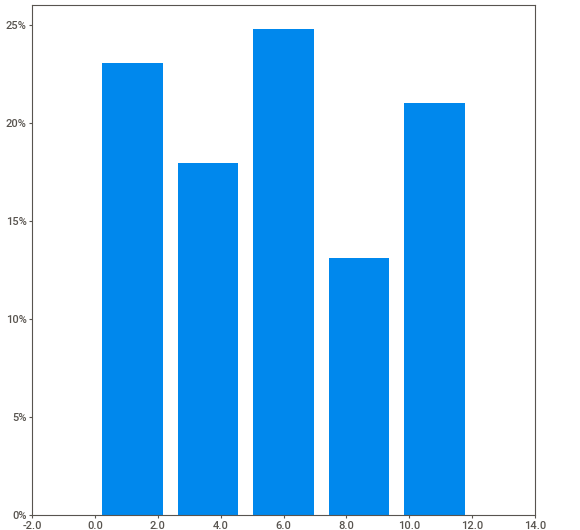
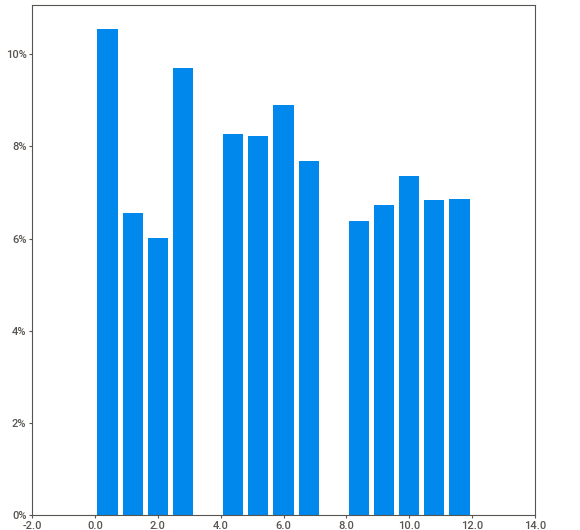
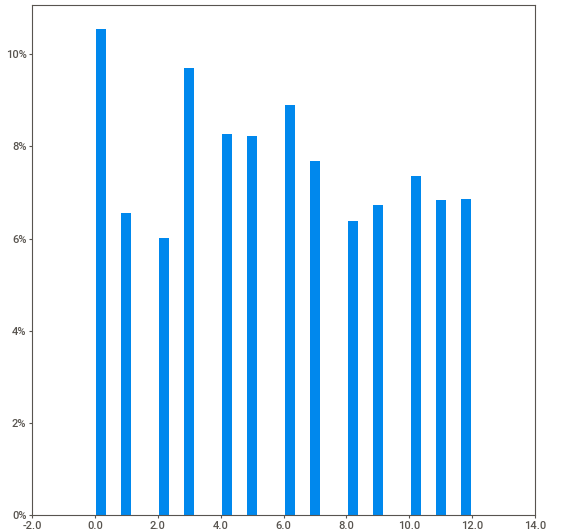
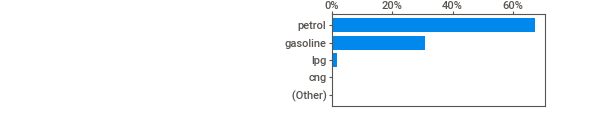
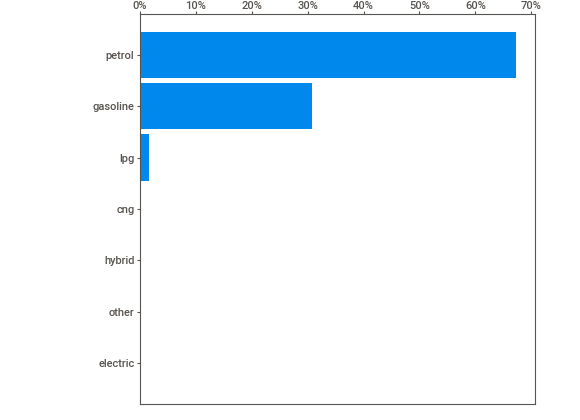
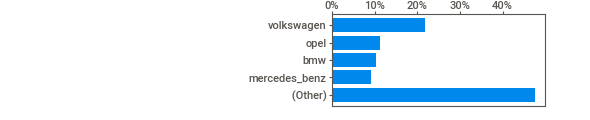
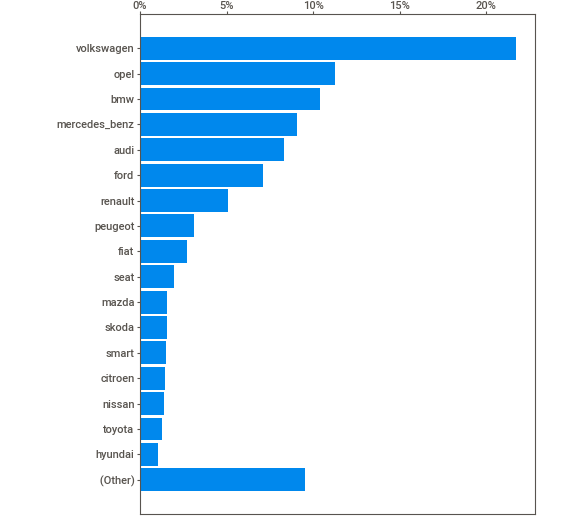
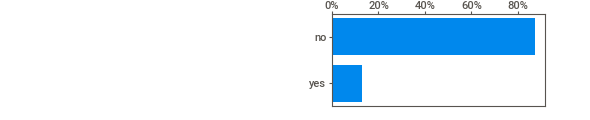
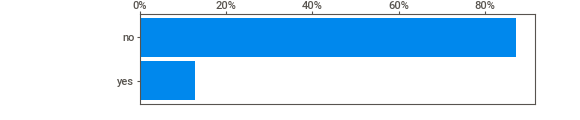
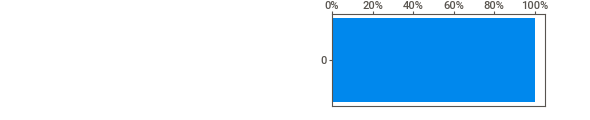
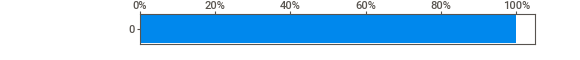
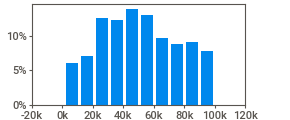
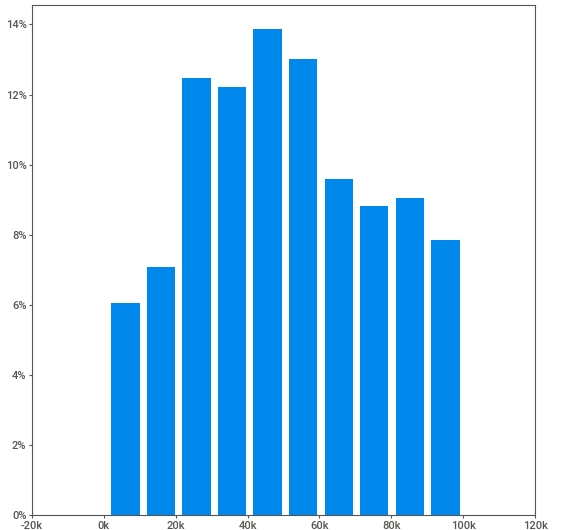
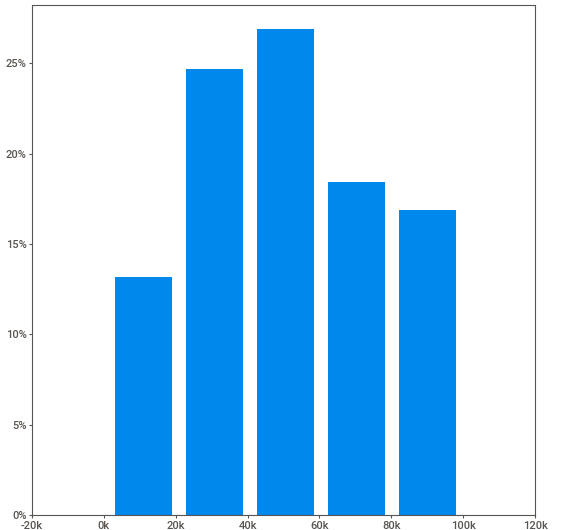
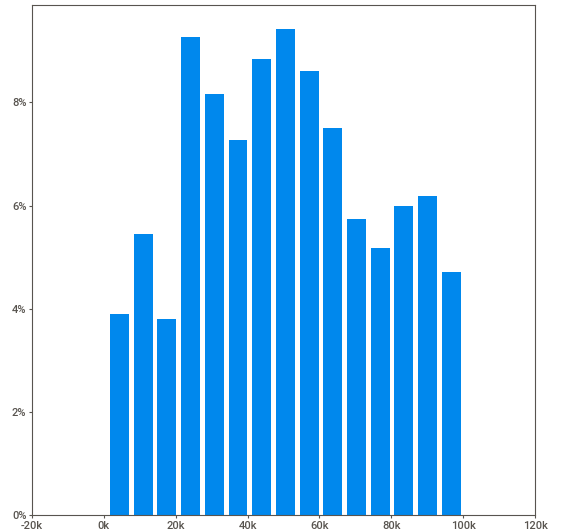
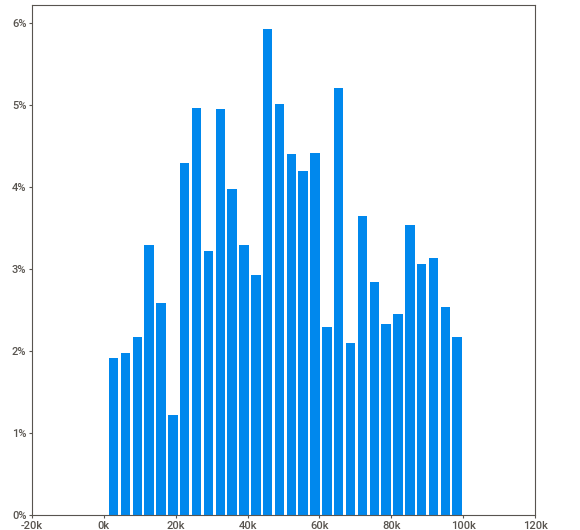
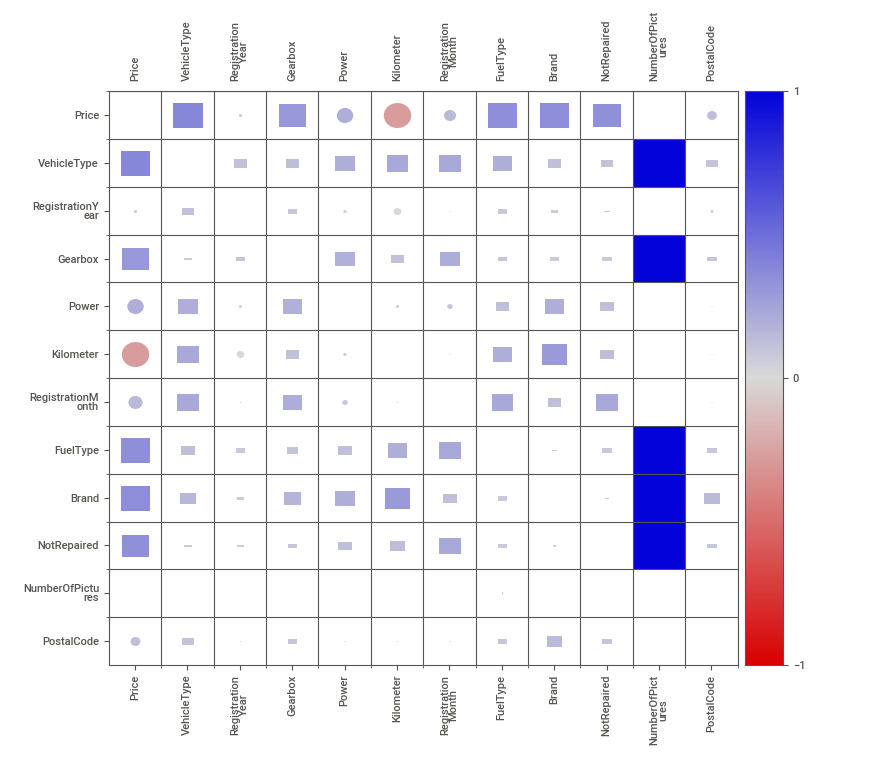
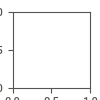

In [9]:
report = sv.analyze(data)
report.show_notebook()

Выявленные проблемы:
 - в данных присутствуют дубликаты;
 - есть пропущенные значения;
 - есть некорректные данные. 
 
Достаточно слабая зависимость целевого признака от следующих данных: 
 - RegistrationMonth;
 - PostalCode;
 - RegistrationYear;
 - NumberOfPictures.

Удалим дубликаты.

In [10]:
data = data.drop_duplicates().reset_index(drop=True) 
print(data.duplicated().sum())

0


### Обработка пропусков

Посмотрим на пропуски.

In [11]:
pd.concat(
    [
        ((data.isna().mean()*100).round(2)).reset_index().rename(columns={0:'percent_NaN'}),
        data.isna().sum().reset_index().rename(columns={0:'count_NaN'})['count_NaN']
    ],
    axis=1
)

,index,percent_NaN,count_NaN
0,DateCrawled,0.00,0
1,Price,0.00,0
2,VehicleType,10.58,37490
3,RegistrationYear,0.00,0
4,Gearbox,5.60,19833
5,Power,0.00,0
6,Model,5.56,19705
7,Kilometer,0.00,0
8,RegistrationMonth,0.00,0
9,FuelType,9.28,32895


`VehicleType`:

In [12]:
data['VehicleType'].value_counts()

sedan          91457
small          79830
wagon          65165
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: VehicleType, dtype: int64

В столбце `'VehicleType'` доля пропущенных значений 10,58%. Удалять данные не целесообразно, cделать правдоподобное предположение о пропущенных данных нет возможности, поэтому заменим пропуски существующей категорией `'other'`.

In [13]:
data['VehicleType'] = data['VehicleType'].fillna('other') 

`Gearbox`:

In [14]:
data['Gearbox'].value_counts()

manual    268249
auto       66283
Name: Gearbox, dtype: int64

В столбце `'Gearbox'` доля пропущенных значений 5,6%. Удалять данные не целесообразно, из бинарной классификации непонятно к какой категории отнесены следующие типы коробки передач: роботизированная, вариативная. Возможно, на эти типы приходится часть пропущенных данных. Заменим пропуски новой категорией `'unknown'`.

In [15]:
data['Gearbox'] = data['Gearbox'].fillna('unknown')

`Model`:

In [16]:
data['Model'].value_counts()

golf                  29232
other                 24420
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: Model, Length: 250, dtype: int64

В столбце `'Model'` доля пропущенных значений 5,56%. Удалять данные не целесообразно, cделать правдоподобное предположение о пропущенных данных нет возможности, поэтому заменим пропуски существующей категорией `'other'`.

In [17]:
data['Model'] = data['Model'].fillna('other') 

`FuelType`:

In [18]:
data['FuelType'].value_counts()

petrol      216349
gasoline     98719
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

В столбце `'FuelType'` доля пропущенных значений 9,28%. Удалять данные не целесообразно. Не ясно присутствует ли в классификации дизельное топливо. Заменим пропуски новой категорией `'unknown'`.

In [19]:
data['FuelType'] = data['FuelType'].fillna('unknown') 

`NotRepaired`:

In [20]:
data['NotRepaired'].value_counts()

no     247158
yes     36053
Name: NotRepaired, dtype: int64

В столбце `'NotRepaired'` доля пропущенных значений 20,08%. Удалять данные не целесообразно. Из описания данных не понятно что следует считать `ремонтом`, а что нет. Вероятно, часть пропусков обусловленна проблемой различия мелкого и серьезного ремонта. Заменим пропуски новой категорией `'unknown'`.

In [21]:
data['NotRepaired'] = data['NotRepaired'].fillna('unknown') 

`Проверка`:

In [22]:
data.isnull().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

### Анализ данных

`Price`:

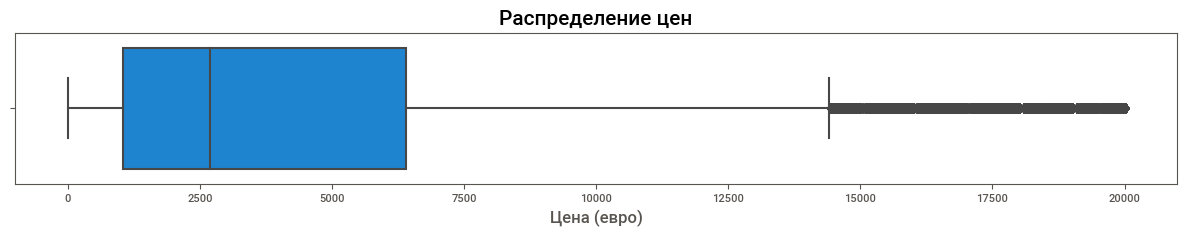

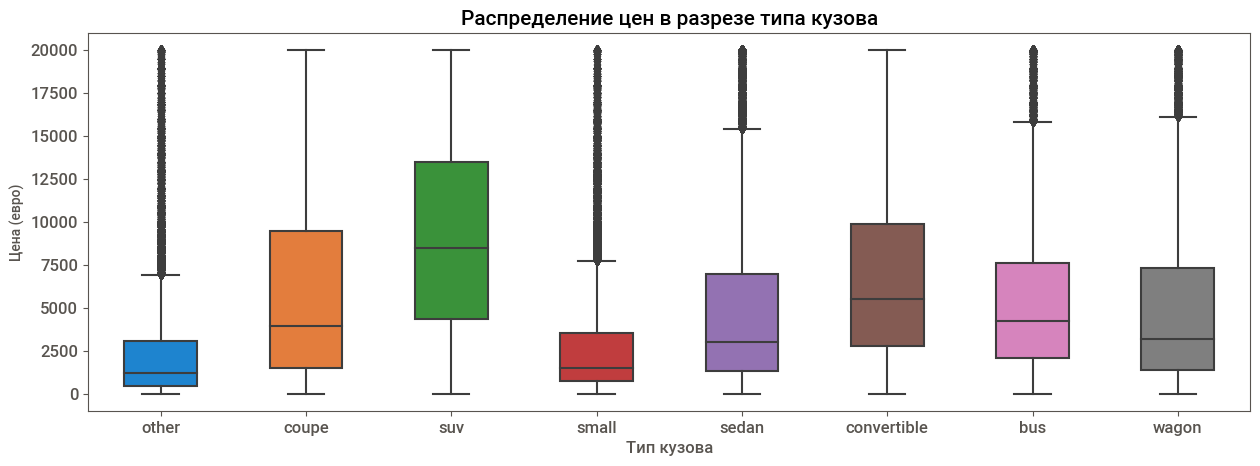

In [23]:
plt.figure(figsize=(15, 2))
ax = sns.boxplot(x=data['Price']);
ax.set_title('Распределение цен', fontsize=15)
ax.set_xlabel('Цена (евро)', fontsize=12)

plt.figure(figsize=(15, 5))
ax = sns.boxplot(x='VehicleType', y='Price', whis = 1.5, width=0.5, data=data)
ax.set_title('Распределение цен в разрезе типа кузова', fontsize=15)
ax.set_xlabel('Тип кузова', fontsize=12)
ax.set_ylabel('Цена (евро)')
ax.title.set_size(15)
ax.tick_params(labelsize=12)

Не будем относить данные со значением целевого признака > 14500 к вбросам.

In [24]:
data['Price'].loc[data['Price'] < 100].count()

13314

Около 3,75% значений целевого признака < `100`. Удалим эти данные.

In [25]:
data = data.loc[data['Price'] >= 100]

`RegistrationYear`:

In [26]:
data['RegistrationYear'].sort_values()

256530    1000
71459     1000
325735    1000
66198     1000
110123    1000
          ... 
306575    9999
29426     9999
17271     9999
227461    9999
200524    9999
Name: RegistrationYear, Length: 341051, dtype: int64

Исходя из того, что анкеты выгружены в 2016 году, данные по регистрации авто за следующие периоды вероятно следует считать некорректными: 

In [27]:
data['RegistrationYear'].loc[(data['RegistrationYear'] > 2016) | (data['RegistrationYear'] <= 1910)].count()

13764

Удалим эти данные. Их доля порядка 4% от выборки.

In [28]:
data = data.loc[(data['RegistrationYear'] <= 2016) & (data['RegistrationYear'] > 1980)]

`Power`:

In [29]:
data['Power'].value_counts()

0        30582
75       21931
60       14550
150      13651
101      12359
         ...  
1625         1
17410        1
6920         1
584          1
1241         1
Name: Power, Length: 677, dtype: int64

In [30]:
data['Power'].loc[(data['Power'] > 620) | (data['Power'] == 0)].count()

30885

Данные с мощностью свыше 620 л.с. и 0 л.с удалим.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323838 entries, 0 to 354364
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        323838 non-null  datetime64[ns]
 1   Price              323838 non-null  int64         
 2   VehicleType        323838 non-null  object        
 3   RegistrationYear   323838 non-null  int64         
 4   Gearbox            323838 non-null  object        
 5   Power              323838 non-null  int64         
 6   Model              323838 non-null  object        
 7   Kilometer          323838 non-null  int64         
 8   RegistrationMonth  323838 non-null  int64         
 9   FuelType           323838 non-null  object        
 10  Brand              323838 non-null  object        
 11  NotRepaired        323838 non-null  object        
 12  DateCreated        323838 non-null  datetime64[ns]
 13  NumberOfPictures   323838 non-null  int64   

In [32]:
data = data.loc[(data['Power'] <= 620) & (data['Power'] > 45)]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288247 entries, 1 to 354364
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        288247 non-null  datetime64[ns]
 1   Price              288247 non-null  int64         
 2   VehicleType        288247 non-null  object        
 3   RegistrationYear   288247 non-null  int64         
 4   Gearbox            288247 non-null  object        
 5   Power              288247 non-null  int64         
 6   Model              288247 non-null  object        
 7   Kilometer          288247 non-null  int64         
 8   RegistrationMonth  288247 non-null  int64         
 9   FuelType           288247 non-null  object        
 10  Brand              288247 non-null  object        
 11  NotRepaired        288247 non-null  object        
 12  DateCreated        288247 non-null  datetime64[ns]
 13  NumberOfPictures   288247 non-null  int64   

`RegistrationMonth`:

In [34]:
data['RegistrationMonth'].value_counts()

3     29707
6     26866
4     25130
5     24993
7     23067
10    22475
12    20767
11    20644
9     20505
1     19561
8     19327
2     18353
0     16852
Name: RegistrationMonth, dtype: int64

Вероятно, нулевые значения соответствуют отсутствующим данным. Месяц регистрации маловероятно связан с ценой автомобиля. Данные можно не использовать.

`NumberOfPictures`:

In [35]:
data['NumberOfPictures'].value_counts()

0    288247
Name: NumberOfPictures, dtype: int64

Столбец можно удалить.

In [36]:
data = data.drop('NumberOfPictures', 1)

`DateCrawled`:

In [37]:
data['DateCrawled'].describe()

count                  288247
unique                 232099
top       2016-04-02 22:54:55
freq                        5
first     2016-03-05 14:06:22
last      2016-04-07 14:36:58
Name: DateCrawled, dtype: object

Анкеты выгружены в период с 05-03-2016 по 07-04-2016. Эти данные с большой долей вероятности не влияют на целевой признак. Не будем использовать их.

`DateCreated`:

In [38]:
data['DateCreated'].describe()

count                  288247
unique                    105
top       2016-04-03 00:00:00
freq                    11369
first     2015-03-20 00:00:00
last      2016-04-07 00:00:00
Name: DateCreated, dtype: object

Анкеты созданы в период с 10-03-2014 по 07-04-2016. Создадим столбew c данными о месяце создания анкеты. Сами данные использовать не будем.

In [39]:
data['DateCreated_month'] = pd.DatetimeIndex(data['DateCreated']).month 

`LastSeen`:

In [40]:
data['LastSeen'].describe()

count                  288247
unique                 151226
top       2016-04-06 13:46:17
freq                       15
first     2016-03-05 14:15:08
last      2016-04-07 14:58:51
Name: LastSeen, dtype: object

Последняя активность пользователей зарегистрирована в период с 05-03-2016 по 07-04-2016. Эти данные с большой долей вероятности не влияют на целевой признак. Не будем использовать их.

`PostalCode`:

In [41]:
len(data['PostalCode'].unique())

8111

Достаточно много уникальных значений. Не будем учитывать географический фактор в модели.

In [42]:
data.describe(include = 'all')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,PostalCode,LastSeen,DateCreated_month
count,288247,288247.000000,288247,288247.000000,288247,288247.000000,288247,288247.000000,288247.000000,288247,288247,288247,288247,288247.000000,288247,288247.000000
unique,232099,NaN,8,NaN,3,NaN,248,NaN,NaN,8,40,3,105,NaN,151226,NaN
top,2016-04-02 22:54:55,NaN,sedan,NaN,manual,NaN,other,NaN,NaN,petrol,volkswagen,no,2016-04-03 00:00:00,NaN,2016-04-06 13:46:17,NaN
freq,5,NaN,81759,NaN,225980,NaN,29045,NaN,NaN,181277,62414,219723,11369,NaN,15,NaN
first,2016-03-05 14:06:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-20 00:00:00,NaN,2016-03-05 14:15:08,NaN
last,2016-04-07 14:36:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-07 00:00:00,NaN,2016-04-07 14:58:51,NaN
mean,NaN,4904.300541,NaN,2003.179575,NaN,122.157556,NaN,128673.203884,6.014762,NaN,NaN,NaN,NaN,51320.552380,NaN,3.161063
std,NaN,4606.305614,NaN,5.813787,NaN,53.200043,NaN,36381.602002,3.578117,NaN,NaN,NaN,NaN,25767.133543,NaN,0.378141
min,NaN,100.000000,NaN,1981.000000,NaN,46.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,1.000000
25%,NaN,1399.000000,NaN,1999.000000,NaN,80.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,30982.000000,NaN,3.000000


### Разделение данных на выборки

Выделим признаки и целевой признак. 

In [43]:
features = data.drop(['Price', 'DateCrawled', 'DateCreated', 'LastSeen', 'RegistrationMonth', 'PostalCode'], axis=1)
target = data['Price']

Разделим данные на выборки.

In [44]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

Проверим размеры полученных файлов.

In [45]:
print(features_train.shape, target_train.shape, features_test.shape, target_test.shape)

(216185, 10) (216185,) (72062, 10) (72062,)


###  OHE и масштабирование признаков

Разделим колонки на два типа: числовые и категориальные.

In [46]:
numerical = ['DateCreated_month', 'Power', 'Kilometer', 'RegistrationYear']
target = ['Price']
categorical  = [col for col in features_test.columns if col not in numerical+target]

Применим к данным OneHotEncoder и StandardScaler.

In [47]:
preprocessor = ColumnTransformer(transformers=[('standardscaler', StandardScaler(), numerical),
                                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [48]:
preprocessor.fit(features_train)
features_train = preprocessor.transform(features_train)
features_test = preprocessor.transform(features_test)

**Вывод**

Данные загружены и проанализированы. Удалены дубликаты и заполнены пропуски. К данным числового типа применено масштабирование, к категориальным данным - OHE кодирование. 

Добавлен новый признак - `'DateCreated_month'` (месяц создания анкеты).
В качестве признаков решено не использовать следующие данные: `'NumberOfPictures'`, `'DateCrawled'`, `'DateCreated'`, `'LastSeen'`, `'RegistrationMonth'`, `'PostalCode'`.

Принято решение считать вбросами следующие данные:
 - 'Price < 100
 - 'RegistrationYear' > 2016 или < 1899 
 - 'Power' > 620 или = 0 

## Обучение моделей

Создадим функцию для оценки времени работы модели.

In [49]:
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
    
   return "{0:02d}:{1:02d}:{2:02d}".format(h, m, s)

Создадим функцию для оценки качества модели.

In [50]:
def quality(title):
    scorers = pd.DataFrame([np.sqrt(mean_squared_error(target_test, predicted_test)), exec_time(start_1,end_1), \
                           exec_time(start_2,end_2)], index=['качество предсказания (RMSE)', \
                           't обучения (с подбором параметров)', 't предсказания'], columns=[title]).round(3).T
    print("на тренировочной выборке: RMSE - {:.2f}".format(np.sqrt(mean_squared_error(target_train, predicted_train)))) 
    print("на тестовой выборке:      RMSE - {:.2f}".format(np.sqrt(mean_squared_error(target_test, predicted_test)))) 
        
    return scorers

results = pd.DataFrame() # датафрейм для хранения результатов работы

### LinearRegression

In [51]:
start_1 = time.time()

param_grid = {'fit_intercept':[True,False],
              'normalize':[True,False]
}
model_1 = LinearRegression()
grid_search = GridSearchCV(model_1, param_grid, cv=3, refit='neg_mean_squared_error')
grid_search.fit(features_train, target_train)
end_1 = time.time()

predicted_train = grid_search.best_estimator_.predict(features_train)

start_2 = time.time()
predicted_test = grid_search.best_estimator_.predict(features_test)
end_2 = time.time()

results = quality('LinearRegression model').join(results) # сохранение результатов
print("Параметры лучшей модели:", grid_search.best_params_)
print("Общее время:", exec_time(start_1,end_2))

на тренировочной выборке: RMSE - 2400.42
на тестовой выборке:      RMSE - 2393.90
Параметры лучшей модели: {'fit_intercept': True, 'normalize': True}
Общее время: 00:00:37


### DecisionTreeRegressor

In [52]:
start_1 = time.time()

param_grid = {'max_depth': [2, 5, 10],
              'min_samples_leaf': [2, 5, 10]
}

model = DecisionTreeRegressor(random_state=12345)
grid_search = GridSearchCV(model, param_grid, cv=3, refit='neg_mean_squared_error')
grid_search.fit(features_train, target_train)
end_1 = time.time()

predicted_train = grid_search.best_estimator_.predict(features_train)

start_2 = time.time()
predicted_test = grid_search.best_estimator_.predict(features_test)
end_2 = time.time()

results = pd.concat([results, quality('DecisionTreeRegressor model')], axis=0, ignore_index=False) # сохранение результатов
print("Параметры лучшей модели:", grid_search.best_params_)
print("Общее время:", exec_time(start_1,end_2))

на тренировочной выборке: RMSE - 1868.79
на тестовой выборке:      RMSE - 1905.65
Параметры лучшей модели: {'max_depth': 10, 'min_samples_leaf': 10}
Общее время: 00:00:37


### CatBoost

In [53]:
start_1 = time.time()

param_grid = {'learning_rate': [0.05, 0.1, 0.5, 1]}

model = CatBoostRegressor()
grid_search = GridSearchCV(model, param_grid, cv=3, refit='neg_mean_squared_error')
grid_search.fit(features_train, target_train, verbose=False)
end_1 = time.time()

predicted_train = grid_search.best_estimator_.predict(features_train)

start_2 = time.time()
predicted_test = grid_search.best_estimator_.predict(features_test)
end_2 = time.time()

results = pd.concat([results, quality('CatBoost model')], axis=0, ignore_index=False) # сохранение результатов
print("Параметры лучшей модели:", grid_search.best_params_)
print("Общее время:", exec_time(start_1,end_2))

на тренировочной выборке: RMSE - 1316.46
на тестовой выборке:      RMSE - 1475.04
Параметры лучшей модели: {'learning_rate': 0.5}
Общее время: 00:03:28


### LGBMRegressor

In [54]:
start_1 = time.time()

param_grid = {'learning_rate': [0.05, 0.1, 0.5, 1]}

model = LGBMRegressor()
grid_search = GridSearchCV(model, param_grid, cv=3, refit='neg_mean_squared_error')
grid_search.fit(features_train, target_train)
end_1 = time.time()

predicted_train = grid_search.best_estimator_.predict(features_train)

start_2 = time.time()
predicted_test = grid_search.best_estimator_.predict(features_test)
end_2 = time.time()

results = pd.concat([results, quality('LGBMRegressor model')], axis=0, ignore_index=False) # сохранение результатов
print("Параметры лучшей модели:", grid_search.best_params_)
print("Общее время:", exec_time(start_1,end_2))

на тренировочной выборке: RMSE - 1469.17
на тестовой выборке:      RMSE - 1534.91
Параметры лучшей модели: {'learning_rate': 0.5}
Общее время: 00:00:09


### Искусственная модель

Проверим наши модели на адекватность, сравнив с исскуственной.

In [55]:
strategies = ['mean', 'median', 'quantile']

for strategy in strategies:

    baseline_model = DummyRegressor(strategy=strategy, quantile=0.65)
    baseline_model.fit(features_train, target_train)

    predicted_train = baseline_model.predict(features_train)
    predicted_test = baseline_model.predict(features_test)
    
    print('Стратегия модели:', strategy)
    quality('title')

Стратегия модели: mean
на тренировочной выборке: RMSE - 4605.36
на тестовой выборке:      RMSE - 4609.11
Стратегия модели: median
на тренировочной выборке: RMSE - 4903.38
на тестовой выборке:      RMSE - 4905.40
Стратегия модели: quantile
на тренировочной выборке: RMSE - 4614.71
на тестовой выборке:      RMSE - 4618.74


Все модели проходят тест на адекватность.

**Вывод**

Все модели прошли тест на адекватность. Результаты работы представлены ниже.

In [56]:
results

,качество предсказания (RMSE),t обучения (с подбором параметров),t предсказания
LinearRegression model,2393.89881,00:00:37,00:00:00
DecisionTreeRegressor model,1905.647356,00:00:37,00:00:00
CatBoost model,1475.038253,00:03:28,00:00:00
LGBMRegressor model,1534.907171,00:00:08,00:00:00


## Анализ моделей

Заказчику важны:

- качество предсказания (`RMSE < 2500`);
- скорость предсказания;
- время обучения.

Продублируем результаты работы моделей и обобщим информацию.

In [57]:
results

,качество предсказания (RMSE),t обучения (с подбором параметров),t предсказания
LinearRegression model,2393.89881,00:00:37,00:00:00
DecisionTreeRegressor model,1905.647356,00:00:37,00:00:00
CatBoost model,1475.038253,00:03:28,00:00:00
LGBMRegressor model,1534.907171,00:00:08,00:00:00


Условию `RMSE < 2500` соответствуют 3 модели: 
 - DecisionTreeRegressor;
 - CatBoost;
 - LGBMRegressor.

ТОП `t обучения`:
 - DecisionTreeRegressor;
 - CatBoost;
 - LGBMRegressor.    

ТОП `скорость предсказания`:

 - DecisionTreeRegressor, CatBoost, 
 - LGBMRegressor.    
 
ТОП `качество предсказания`:
 - CatBoost;
 - LGBMRegressor;  
 - DecisionTreeRegressor.   

**Вывод**

В качестве рабочих моделей для предсказания стоимости автомобиля можно рекомендовать `DecisionTreeRegressor` и `CatBoost`.
Результаты работы этих моделей на тестовой выборке:

In [58]:
results[1:3]

,качество предсказания (RMSE),t обучения (с подбором параметров),t предсказания
DecisionTreeRegressor model,1905.647356,00:00:37,00:00:00
CatBoost model,1475.038253,00:03:28,00:00:00
